<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/7_intro_to_artificial_neural_networks_and_tensorflow/3_neural_networks_for_regresion_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Neural Networks for Regression with TensorFlow

### Contents 

* [1. Intro to Regression with TensorFlow](#1)
* [2. Starting Simple: Fitting a Straight Line](#2)
   * [2.1 Gathering the data](#2-1)
   * [2.2 Looking in the data](#2-2)
   * [2.3 Preparing the data for a model](#2-3)
   * [2.4 Creating, Compiling and Training a model](#2-4)
   * [2.5 Evaluating a model](#2-5)
   * [2.6 Improving a model](#2-6)
  

* [3. Going Beyond: A Real world dataset](#3)
   * [3.1 Gathering the data](#3-1)
   * [3.2 Looking in the data](#3-2)
   * [3.3 Preparing the data for a model](#3-3)
   * [3.4 Creating, Compiling and Training a model](#3-4)
   * [3.5 Evaluating a model](#3-5)
   * [3.6 Improving a model](#3-6)
   * [3.7 Saving a model](#3-7)
   * [3.8 Final notes](#3-8)


<a name='1'></a>
## Intro to Regression with TensorFlow

We know neural networks in taking moonshots but they can also be used for regression problems. 

In regression task/problems, we are interested in predicting the a single or multiple continous numbers. 

Take an example of house price prediction. We can be given the properties/features of the house such as size, region, and number of bedrooms to predict the price of such house. This example is a single number prediction, also termed as `univariate regression`. 

Another example appears in object detection(recognizing & localizing image). In order to localize the object with the bounding box, you have got to find the coordinates of the object's center and the bounding box. The prediction of these coordinates is an example of predicting multiple values at once. It is usually termed as `multivariate regression`. 

Any typical architecture for a regression neural network will have common values or ranges of values of `hyperparameters` (hyperparameters are all parameters that you as engineer has to set, such as learning rate, number of layers, etc..). 
Let's discuss them. 


#### **Input, hidden, and Output Layers**

The input layer usually has the neurons(or units) equivalent to the number of input features. For example, if our house dataset has 10 variables, 9 input training features, 1 target feature(price of house), then the input neurons will be 9. 

The number of hidden layers depend on the problem and the size of the dataset, but generally, it will be between 1 and 5. Same is true about the number of neurons in each hidden layer, it will depend on the problem & dataset size, but generally, neurons can be between 10 to 100. 

The number of neurons in output layer will depend on the problem. If you are predicting a single number, it will be 1. If you are predicting the coordinates of the object's center and bounding box during object detection, it will be 4 (because there are 4 coordinates, 2 for object's center, 2 for height/width of the box). 


#### **Activation Function**

The choice of activation function depends on the problem, but in most cases, `relu` will work well in hidden layers. 

The activation function in the output layer is very specific on the goal of the problem. Unlike neural network classifiers that usually use [`sigmoid`](https://en.wikipedia.org/wiki/Sigmoid_function) or [`softmax`](https://en.wikipedia.org/wiki/Softmax_function), regressor doesn't need to have an activation since you want the output values as they are. That being said, you may want to prevent the negative values in the output layer. In that case, you can use [`ReLU`](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)). 


#### Training Loss Function

The loss function used in regression is usually [`Mean Squared Error(MSE)`](https://en.wikipedia.org/wiki/Mean_squared_error). When you are aware that your dataset contain outliers, you can use [`Mean Absolute Error (MAE)`](https://en.wikipedia.org/wiki/Mean_absolute_error). MAE can potentialy be used in time series prediction since that type of data tends to have outliers.

Another loss function that is used alot if [Huber loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/huber). It is combination of both MSE and MAE. 

#### Optimizer

A good rule of thumb when choosing an optimizer is to start with [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam). There are other optimizers that you can try, such as SGD(Stockastic Gradient Descent), RMSProp, Nadam, etc...Learn more about them on [TensorFlow optimizer documentation page](https://www.tensorflow.org/api_docs/python/tf/optimizers). 

Below is a summary of hyerparameter best practices in neural network regressors.



| **Hyperparameter** | **Typical value** |
| --- | --- |
| Neurons at input layer | 1 neuron per feature |
| No of hidden layer(s) | depend on problem, start from 1 to 10 |
| Neurons per hidden layer | depend on problem, generally 10 to 100 |
| Neurons at input layer | depend on the desired result, 1 for univariate regression |
| Activation in hidden layers| Relu or its variants(LeakyReLU, SeLU|
| Activation in output layer |None in most cases|
| Loss function | MSE or MAE |
| Optimizer | SGD, Adam, RMSProp |

*Table: Typical values of hyperparameters in neural network regressors*

There are many hyperparameters in neural networks and finding the best values of each and each can be overwhelming. 

When choosing hyperparameters, it is advised to use hyperparameter tuning tools such as [Keras Tuner](https://keras.io/keras_tuner/) to search the best hyperparameters whenever possible. It is nearly impossible to assume that a given value of hyperparamater will work well at first. We usually have to experiment with different values, and a good tool can help you do that quickly. 

Let's put all of the above into practice, starting simple, and later, taking a futher step into real world dataset.

<a name='2'></a>

## 2. Starting Simple: Fitting a Straight Line

One of the simplest things we can model is perhaps a linear equation(it has been proven that [neural networks can model any mathematical function](http://neuralnetworksanddeeplearning.com/chap4.html)). 

So, a linear equation forms a straight line. Its form is `y=aX+b` where a is coefficient (or `weight`) and b is intercept (or `bias`). 

Let's assume that we have this equation `y=2X+1` and we are interested in using neural networks to predict y given any value of X. 

But we will start with creating our data based off such equation. 

<a name='2-1'></a>
### 2.1  Gathering the data

Let's first import the libraries. I will import `TensorFlow`, `NumPy` and `Matplolib` for plotting the straight line.

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

After we have imported all relevant libraries, it's time to create our data. We only have one input feature (`X`) and output label `y`. 

We can either create it with `tf.constant()` or `np.array()`. Both will work, but for convenience, let's use `tf.constant()`.

In [2]:
# Create input feature X

X = tf.constant([-2,-1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10,12])

# Create label y

y = tf.constant([-3.0,-1.0,1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,21.0,25.0])

<a name='2-2'></a>
### 2.2  Looking in the Data

It's always good to look in the data. This can be done in many ways and it depend on the kind of the dataset. If you're working with images, you might want to go through some images and their labels looking if there are no mislabelling. 

In structured data, or data in tabular form, you might have to visualize the distribution of individual features or plot their relationship. 

For us now, we have a simple data. Let's scatter plot X and y.

Text(0, 0.5, 'y')

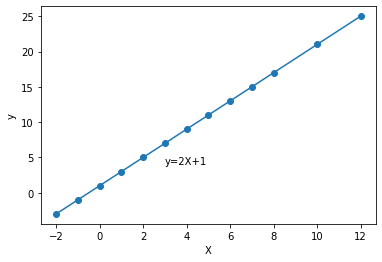

In [3]:
# Visualizing X and y

plt.plot(X,y) #This will plot a line
plt.scatter(X,y) 
plt.annotate('y=2X+1', xy=(3,4))
plt.xlabel('X')
plt.ylabel('y')

<a name='2-3'></a>
### 2.3  Preparing data for the model

Usually when working with real world datasets, we need to spend an enourmous amount of time preparing it. The type of things to be done depend on the kind of the dataset, but typically, it can be removing/filling missing values, scaling the features either with normalization or standardization, and so on. 

For now, we can leave our data as it is. In the next labs, we will see some real world datasets that needs extra work before feeding them to the machine learning model.

<a name='2-4'></a>
### 2.4  Creating, Compiling and Training a Model

We are going to create the model having a one layer, one neuron(or unit) and as the input data is a single number, we will set the `input_shape` to `[1]`. 

Later, we will explain everything we did.

In [4]:
model = tf.keras.Sequential([
                             
                             keras.layers.Dense(units=1, input_shape=[1])
])

And we can see the model summary. Model summary is essential for quick review of the model architecture. As you can see, we only have one dense layer, and 2 parameters(weight and bias).

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


The model that we created is called a  Sequential model. We create it by adding one layer after another. If we had many layers, it would be like a sequence or series of layers, one after another, from the input to the ouput. You can learn more about Sequential API [here](https://keras.io/api/models/sequential/).

After we have created the model, all we have is an empty graphs. We need to do two more things, compiling and training/fitting the model to the presented data. 

In [6]:
model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])

The single most reason of why we compile the model is to specify the optimizer, loss function and the metrics that we want to track during training. 

During training, loss function will be used to measure the difference between the prediction and the actual output. Such difference is called `error`, but we want to measure the `the mean of squared error`, hence the name.

`Error = Actual value – Predicted value`. 

On the otherhand, optimizer is used to reduce the error between the actual output and predicted value. The optimizer will make continous guesses until the minimum error is reached. There are many optimizers, but for now let's use SGD (Stockastic Gradient Descent). In later labs, we will explore other optimizers. 

By fitting the model to the data, here are what happen:

* The model iterate through each input data point and estimate prediction 
* The difference between the actual and predicted value or error is calculated by loss function
* The error is minimized by optimizer as we go through the data
* The above iteration continue until the number of epochs are reached. 


Let's see that in action, fitting the model to the data, calculating and reducing the error until we make 500 turns. 

In [7]:
history = model.fit(X,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 583ms/step - loss: 240.2002 - mse: 240.2002
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 20.7756 - mse: 20.7756
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9780 - mse: 1.9780
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3642 - mse: 0.3642
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2222 - mse: 0.2222
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2064 - mse: 0.2064
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2015 - mse: 0.2015
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1976 - mse: 0.1976
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1938 - mse: 0.1938
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1901 - mse: 0.1901
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - lo

As you can see, the loss went from `1.2677e-05` all the way down to `8.5635e-10`. If you run it again, these values may change. There are so many randomness involved in neural network training. Take an example, weights initialization is random. 

<a name='2-5'></a>
### 2.5  Evaluating a Model

After we have trained the model, the next step is to evaluate it. 

But first off, we can plot the loss versus the epochs to see how it performed. Plotting the model metrics is a fundamental step in performing the error analysis. 

The training metric `mse` and `loss` are contained in `history.history` and the number of epochs are in `history.epoch`. 

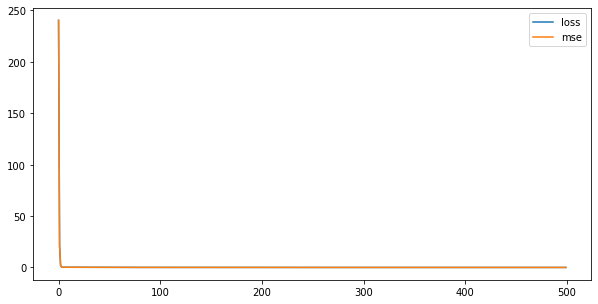

In [8]:
loss_df = pd.DataFrame(history.history)

# Plot loss vs epochs

loss_df.plot(figsize=(10,5))

There are cowple of things to note from the above graph. 

* First off, the loss and metric we are tracking are all similar. They are both `mean_squared_error` or `mse`.
* The model had no improvement from 80(approx) epochs. This means that 500 epochs was too much, and instead of burning resources or compute power, we would have trained for fewer epochs since the model does not show a significant improvements in the later epochs. 

Training for many epochs beyond what's needed is usually the cause of `overfitting`. We will learn more about overfitting later, but simply, it's when the model is so good on the training set but very poor on the test set or the new data. So, in our case we are forcing the model to fit the data by training it too much. Overfitting can also be caused by using bigger models (for small dataset), etc...


That said, let's make some predictions on unseen data. For simplicity, let's predict `y` of `X=30`. Remember that our equation is `y=2X+1`, so with x=30, y should be equal to `61`.


In [9]:
model.predict([30.0])

array([[61.014885]], dtype=float32)

Wow! That's so impressive. 

The model was able to determine the relationship between `X` and `y` and can use that relationship to predict `y` for unseen values of `X`. 

One thing to note that it is not guarranted to get the exact predictions, say 61. This is because there are so many randomness and probabilities involved behind the scene. 


One last thing we can try is to get the model parameters, that is weight and bias. And their values should be close to the coeffient and intercept of our linear equation, y=2X+1. 2 is coefficient(or weight), and 1 is the intercept(or bias). 

In [10]:
# Getting the model weights

model.get_weights()

[array([[2.0006804]], dtype=float32), array([0.994472], dtype=float32)]

So, as you can see, the model learned that the relationship between X and y is `y=2.0008771 + 0.9928744` and this is very close to `y=2X+1`. Something intringuing here is that there is no where told the model such relationship - `it simply learned it observing the data that we provided`, and `this is the basis of the idea that machine learning is used to extract patterns in data`. 

With complex data, you might not get such intuition because there will be so many parameters, but in our case, the model was simple, the data was simple, and that allowed us to `uncover` the principal idea behind machine learning - `learning the relationship/pattern between the input features and labels, and using such relationship to make predictions on unseen data.`

<a name='2-6'></a>
### 2.6  Improving the results

Ideally, your model will likely not be good at the first. 

You will need to tweak some hyperparameters, or even improve the data. Also, there is a notion that [machine learning model is only 5% of what are to be done to ship a working machine learning system](https://jeande.medium.com/ml-model-is-5-what-should-we-be-doing-cd68ae14ad7f).  So, often, all you need is to improve the data than improving the model. There are even state of the art and open source models that you can take an advantages of if you have good data. And in those intances, building model will be out of the equation.  

But of course, improving the model and performing error analysis is not a trivial task and will depend on the results of the model on training and testing set. Here is some ideas that can guide you: 

* If the model is not doing well on the training data, it's a clue that the input data (X) doesn't contain the useful information needed to predict the output y. Or put it simply, the input features do not have `high predictive power`. The right thing to do here is to improve the data. Otherwise, the problem will perssit. 

* If the model is doing well on the training data but poorly on the testing data, it maybe that you overfitted the training data and that resulted in model failing to generalize on test/new data. Overfitting is one thing, there maybe other things not going well or worth improving. The right thing to do here is to plot the learning curve and see what's to be done based off what you are seeing.






Up to now, we have come a long way doing regression with neural networks. We have learned how to create a simple data, how to create, train, and compile a simple model, evaluating the results, and we saw some ideas on perfoming error analysis. 

We started simple with the goal of getting prepared to take a step further into real world scanerios. I wanted to jump quicky to bigger models and computer vision things but I remembered that quite often, it is understanding the basics that can set us off for understanding the bigger picture. 

To make it more exciting, let's not stop on linear equation (we could after all, we did regression already), but let's step into real world dataset, still practicing regression. 

<a name='3'></a>

## 3. Going Beyond: A Real world dataset

Welome to the second part of the notebook, where we leap into real world scenarios. 

Still doing regression, we will use the real world forest dataset to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data. 

You can learn more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Forest+Fires).

<a name='3-1'></a>

## 3.1 Loading the data

Before loading the dataset, I will first import all relevant imports. 

Here are the information about the attributes: 

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

Source: https://archive.ics.uci.edu/ml/datasets/Forest+**Fires


In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's download the dataset and load it into a Pandas dataframe using `pd.read_csv()`,

In [12]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

forest_df = pd.read_csv(dataset_url)

Let's see the features and their data types

In [13]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


The dataset contains 517 examples and 13 columns, 12 features and 1 label (`areas`). 

In [14]:
print(forest_df.shape)

(517, 13)


<a name='3-2'></a>

## 3.2 Looking in the data

We will not go deep into analysis, but let's try to learn about the data we have. Before that, I will first split the dataset into training and test set. 

I will use Scikit-Learn `train_test_split`.

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(forest_df, test_size=0.3, random_state=42)

In [16]:
print('The shape of training data: {}\nThe shape of testing data: {}'.format(train_data.shape, test_data.shape))

The shape of training data: (361, 13)
The shape of testing data: (156, 13)


Let's peep into the data.

In [17]:
train_data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
311,6,3,sep,sun,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0,14.29
368,6,5,sep,sat,91.2,94.3,744.4,8.4,16.8,47,4.9,0.0,12.64
23,7,4,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00
271,8,6,aug,tue,92.1,152.6,658.2,14.3,20.1,58,4.5,0.0,9.27
299,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00


It seems that we have two categorical features, `month` and `day`. We will remember to encode them. For now we can see the number of samples in each month and later in each day. 

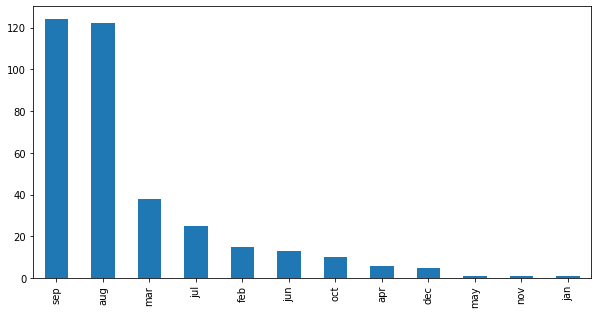

In [18]:
train_data['month'].value_counts().plot(kind='bar', figsize=(10,5))

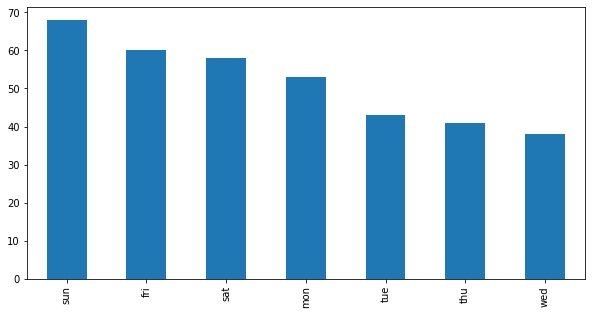

In [19]:
train_data['day'].value_counts().plot(kind='bar', figsize=(10,5))

We can also check the distribution of the area. Area is very skewed, you can see that most values are very close to zero. 



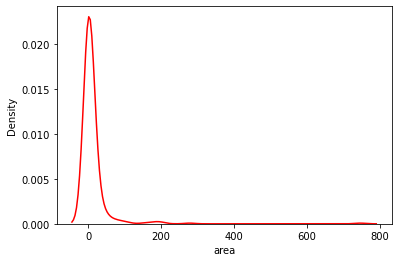

In [36]:
sns.kdeplot(data=train_data, x='area', color='red')

<a name='3-3'></a>

## 3.3 Preparing the Data for the Model

Here we will do two things, one is to normalize numerical features and the second is to encode categorical features. We can set up a pipeline to handle that. 

For simplicity, we will use Scikit-Learn processing functions. 

I will first separate features and label. We can use a function that can also be applied to test set.  

In [21]:
def get_feats_and_labels(data, label):
  """ Take data and label as inputs, return features and labels separated """

  data_feats = data.drop(label, axis=1)
  data_label = data[label]

  return data_feats, data_label

Let's use the function created above to get the features and labels.

In [22]:
train_feats, train_label = get_feats_and_labels(train_data, 'area')

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

scaler = StandardScaler()
encoder = OrdinalEncoder()


# The column transformer requires lists of features

num_feats = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']
cat_feats = ['month', 'day']

# define the pipeline to scale the numeric features and handle categorical features
final_pipe = ColumnTransformer([
   ('num',scaler , num_feats),    
   ('cat', encoder , cat_feats)                        

])

training_data_prepared = final_pipe.fit_transform(train_feats)

Now, we can see the shape of the transformed dataset. It is a NumPy array. 

In [24]:
training_data_prepared.shape

(361, 12)

In [25]:
type(training_data_prepared)

numpy.ndarray

Also let's tranform the test set. Note that for the test set, we don't `fit_transform()`. 

I will get the features and labels separated first.

In [26]:
test_feats, test_label = get_feats_and_labels(test_data, 'area')

And now we transform the test features.

In [27]:
test_data_prepared = final_pipe.transform(test_feats)

Let's convert train and test labels to NumPy array.

In [28]:
train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

<a name='3-4'></a>

## 3.4 Creating, Compiling and Training a Model

Now that our data is prepared, it's time to create a neural network regressor. 

Like in the first example, we will use the [Sequential API](https://keras.io/api/models/sequential/). 

Everytime we are creating a model in TensorFlow, we have to specify the input shape. In this example, the input shape will be:


In [29]:
input_shape = training_data_prepared.shape[1:]
input_shape

(12,)

In [30]:
model = keras.models.Sequential([
                                 
            # The first layers must specify the input shape always
            keras.layers.Dense(12, activation='relu', input_shape=input_shape),
            keras.layers.Dense(24, activation='relu'),

            # The last layer usually doesn't have activation function in regression
            keras.layers.Dense(1)                

])

# Now we compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

Let's see the model summary. 

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


Remember, when the model is created in TensorFlow, it is like an empty graphs. We can even visualize it. 


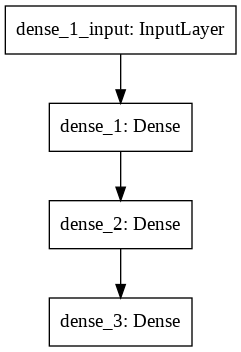

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

Before training or fitting the model to the data, a model is nothing other than empty graphs. 

Now let's train the model. 

In [33]:
history = model.fit(training_data_prepared, train_label, 
                    validation_data = (test_data_prepared, test_label), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 17ms/step - loss: 2500.8550 - val_loss: 8183.7715
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 2489.0750 - val_loss: 8166.7290
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 2480.3232 - val_loss: 8150.3276
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 2470.4707 - val_loss: 8137.5972
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 2462.4663 - val_loss: 8124.1401
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 2453.9116 - val_loss: 8110.1162
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 2445.4663 - val_loss: 8095.4053
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 2435.2563 - val_loss: 8077.7803
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 2426.2720 - val_loss: 8056.7891
Epoch 10/50
12/12 [==============================] - 0s 5ms/ste

<a name='3-5'></a>

## 3.5 Evaluating a Model

After we have trained the model, the next step is to evaluate it. 

But first off, we can plot the loss versus the epochs to see how it performed. Plotting the model metrics is a fundamental step in performing the error analysis. 

`loss` and `val_loss` are contained in `history.history` and the number of epochs are in `history.epoch`. 

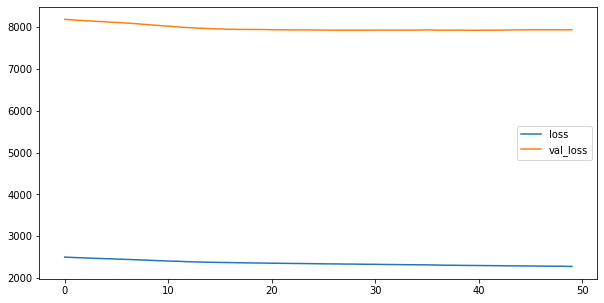

In [34]:
loss_df = pd.DataFrame(history.history)

# Plot loss vs epochs

loss_df.plot(figsize=(10,5))

In [35]:
model.evaluate(test_data_prepared, test_label)

5/5 [==============================] - 0s 2ms/step - loss: 7934.7148


7934.71484375

The results are not impressive. Let's try to think why the model is not doing well. There are some few things to draw from the graph above. 

* Ideally, both validation and training loss should decrease during training. If training doesn't decrease, it's very likely that the input features don't contain enough information to predict the output. 

* Both `loss` and `val_loss` didn't improve alot, and there is no evidence that training for more epochs will improve the results. Quite the opposite, there is evidence that it will not improve.

* How about adding more layers, or neurons? There is a notion that a model is as good as the data it was trained on. In most cases, the sure thing to improve or add more data.

Let's see what we can improve.

<a name='3-6'></a>

## 3.6 Improving the Model

This data is very skewed. The burned area of the forest varies from 0.00 to 1090.84 but it's skewed to ward 0. Take a look at it again below...

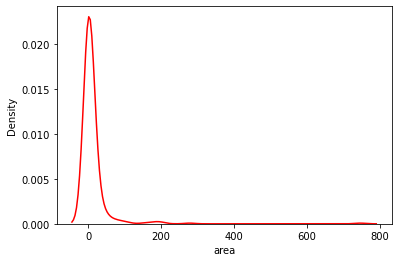

In [37]:
sns.kdeplot(data=train_data, x='area', color='red')

As the data source suggested, it may make sense to model it with logarithmic loss. Let's use `LogCosh class` that is available in [Keras Regression losses](https://keras.io/api/losses/regression_losses/#logcosh-class). That type of loss function computes the logarithm of the hyperbolic cosine of the prediction error.

Also, as the most values of the target label `area` falls between 0 and 1, we can use the `sigmoid` activation function so that the output of the network doesn't swing above such range. 



In [59]:
model_2 = keras.models.Sequential([
                                 
            # The first layers must specify the input shape always
            keras.layers.Dense(12, activation='relu', input_shape=input_shape),
            keras.layers.Dense(6, activation='relu'),

            # The last layer usually doesn't have activation function in regression
            keras.layers.Dense(1, activation='sigmoid')                

])

# Now we compile the model
model_2.compile(loss='log_cosh', optimizer='adam')

In [60]:
history = model_2.fit(training_data_prepared, train_label, 
                    validation_data = (test_data_prepared, test_label), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 13ms/step - loss: 11.5257 - val_loss: 14.5699
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 11.5059 - val_loss: 14.5482
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 11.4805 - val_loss: 14.5220
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 11.4523 - val_loss: 14.4939
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 11.4251 - val_loss: 14.4703
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 11.4017 - val_loss: 14.4518
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 11.3838 - val_loss: 14.4395
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 11.3710 - val_loss: 14.4299
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 11.3635 - val_loss: 14.4229
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 11.3571 - val_loss: 14.419

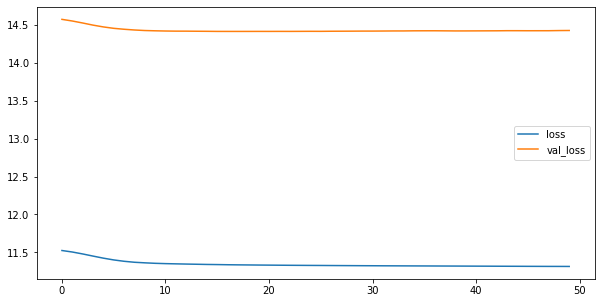

In [61]:
loss_df = pd.DataFrame(history.history)

# Plot loss vs epochs

loss_df.plot(figsize=(10,5))

In [62]:
model.evaluate(test_data_prepared, test_label)

5/5 [==============================] - 0s 3ms/step - loss: 18.7532


18.75318717956543

<a name='3-7'></a>

## 3.7 Saving and Loading a model

If something went well, from training to evaluating to improving a model, you would want to save it. 

Here is how to save a model and how to load a saved model. The model will be saved in HDF5 `format`. When the model is saved in such format, the whole model things are saved. 

In [ ]:
model.save('forest_model.h5')

And loading the model is simple too...

In [ ]:
loaded_model = keras.models.load_model('forest_model.h5')

You can make predictions on a loaded model. 

<a name='3-8'></a>

## 3.8 Final Notes

It has been a quite long journey, from fitting a straight line to building a neural network for a real world dataset. 

Ideally, for all datasets we used, neural networks would not be a suitable model. But because we are learning, it makes sense to start simple for the sake of understanding the latter. 

In the next lab, we will do classification with neural networks. Later we will go deep into areas that neural networks have shown potential such as computer vision and natural language processing, and that's where we will practice all possible techniques of improving the results of the neural networks.

## [BACK TO TOP](#0)